# 1st Tutorial

## Introduction to 3 Datasets

This tutorial will start firstly by introducing 3 commonly used datasets from which we will use 1 later on:

**MNIST**: The MNIST dataset contains 70,000 images of handwritten digits from zero to nine (written by students like you and also professors) that have been centered in a square grid of pixels. Each image is a 28 × 28 × 1 array of floating-point numbers representing grayscale intensities ranging from 0 (black) to 1 (white). The target data consists of one-hot binary vectors of size 10, corresponding to the digit classification categories zero through nine.

Let's see how the images look like:

![title](img/MNIST.png)

**CIFAR-10**: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

Below we show the classes in the dataset, as well as 10 random images from each:

![title](img/CIFAR-10.png)

**FMNIST**: Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Below you can see how the dataset looks like (each class takes three-rows):

![title](img/FMNIST.png)

You can find all of these datasets in the following Google Drive link :
    https://drive.google.com/drive/folders/1H5ypmIO9JQbkZZrwB4ZcwIQZBP0XVXwk

## Introduction to Normalization

Normalization is a technique that is used in order to prepare data for machine learning.

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

For example, consider a data set containing two features, age(x1), and income(x2). Where age ranges from 0–100, while income ranges from 0–20,000 and higher. Income is about 1,000 times larger than age and ranges from 20,000–500,000. So, these two features are in very different ranges. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor.

To get a more detailed explanation about normalization we recommend the following guide: https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

We will show how to normalize the following dataset found on: https://archive.ics.uci.edu/ml/datasets/Parkinsons

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

We first need to get the data from the CSV file to an in memory object:

In [1]:
import pandas as pd

#reading data from the file 
data = pd.read_csv('parkinsons.data')

So now that we have the data from the parkinsons file let's see how it looks like

As we can see the second feature 'MDVP:Fo' that means 'Average vocal fundamental frequency' is measured in Hz so its values will be around the hundreds, as we can see for the first row it is 119.992.

The problem here is that the 5th feature is in percentage (%) so its value with be very low, so we need to normalize the dataset.

In [2]:
#First lets swap the label so that its in the last column, as this is normal in ML

# get a list of the columns
col_list = list(data)

# use this handy way to swap the elements
data['PPE'], data['status'] = data['status'], data['PPE']
PPE_index,status_index= col_list.index('PPE'),col_list.index('status') 

# just swapping the PPE element with status(label)
col_list[PPE_index],col_list[status_index]=col_list[status_index],col_list[PPE_index]

data.columns=col_list

#We dont want to normalize name and status
col_list.remove('name')
col_list.remove('status')

cols_to_norm = col_list 

# Lets normalize the data with Min-Max Normalization, We will explain this more in depth further on
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

Ok so lets see if the data is normalized

In [3]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,PPE,RPDE,DFA,spread1,spread2,D2,status
0,phon_R01_S01_1,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,...,0.332584,0.068307,0.511745,0.497310,0.369155,0.960148,0.569875,0.585765,0.390661,1
1,phon_R01_S01_2,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,...,0.516048,0.059331,0.432577,0.671326,0.470830,0.977024,0.703277,0.741337,0.473145,1
2,phon_R01_S01_3,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,...,0.443317,0.039596,0.496220,0.596682,0.404416,1.000000,0.636745,0.686371,0.408819,1
3,phon_R01_S01_4,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,...,0.475478,0.040997,0.495936,0.671949,0.416255,0.975885,0.695627,0.738089,0.436977,1
4,phon_R01_S01_5,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,...,0.584542,0.054174,0.455499,0.757611,0.375159,0.992813,0.762472,0.513798,0.404336,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,...,0.362306,0.085909,0.450134,0.183318,0.447684,0.333127,0.257894,0.260408,0.549049,0
191,phon_R01_S50_3,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,...,0.221338,0.055543,0.435097,0.257558,0.408567,0.434101,0.319956,0.276956,0.605474,0
192,phon_R01_S50_4,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,...,0.156631,0.338988,0.383728,0.180580,0.352318,0.324299,0.212945,0.342577,0.558967,0
193,phon_R01_S50_5,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,...,0.155989,0.227838,0.429936,0.163137,0.454176,0.277579,0.220650,0.452885,0.318222,0


As we can see the data is normalized, all features have a value on range between 0 and 1

Ok so as we see the values are in the same range now, the feature MDVP:Fo(Hz) and MDVP:Jitter(%) have similar values, so they arent so distant. This will be helpfull for the classifier in the future.

So as you can see we have used Min-Max Normalization, we will explain how this is done and also other 2 normalization methods:

## Min-Max Normalization

To understand this first assume you have a dataset X, which has N rows(entries) and D columns(features). X[:,i] represent feature i and X[j,:] represent entry j. We have:

![title](img/min-max.png)

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

## Z-Score Normalization

Z-score normalization is a strategy of normalizing data that avoids this outlier issue. The formula for Z-score normalization is below:

![title](img/z-score.png)

Here, μ is the mean value of the feature and σ is the standard deviation of the feature. If a value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number. The size of those negative and positive numbers is determined by the standard deviation of the original feature. If the unnormalized data had a large standard deviation, the normalized values will be closer to 0.

## Decimal Point Normalization

It involves the data transformation by dragging the decimal points of values of feature F. The movement of decimals is very dependent on the absolute value of the maximum. A value of feature F is transformed to by calculating:

![title](img/Decimal.jpg)


In this formula, j is the lowest integer while Max (|) < 1.

For instance, values for feature F scale from 850 to 825. Suppose j equals to three. In this case, the maximum absolute value of feature F equals 850. Applying the normalization with decimal scaling, we need to divide all values by 1,000. Therefore, we get 850 normalized to 0,850 as well as 825 transformed to 0,825.

This technique entails the transformation of the decimal points of the values according to the absolute value of the maximum. It follows that the means of the normalized data will always be between 0 and 1.

## Principal Component Analysis

We will just give a brief introduction to PCA and give a good article and video explaining it.

Principal Components Analysis (PCA) is an algorithm to transform the columns of a dataset into a new set of features called Principal Components. By doing this, a large chunk of the information across the full dataset is effectively compressed in fewer feature columns. This enables dimensionality reduction and ability to visualize the separation of classes or clusters if any.

To understand this better there is a good site that you can see this with images: https://setosa.io/ev/principal-component-analysis/

And also a good youtube video explaining: https://www.youtube.com/watch?v=FgakZw6K1QQ

## K-NN Classifier

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It simply calculates the distance of a new data point to all other training data points.

So the algorithm is the following:

Given a new item:
    1. Find distances between new item and all other items
    2. Pick k shorter distances
    3. Pick the most common class in these k distances
    4. That class is where we will classify the new item
    
Let's see this in action:

First we need to preprocess the data, i.e tell what the label is. We know from the previous explanation that the target from the parkinsons data set is the status (The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.)



So first we need to split our dataset into its attributes and labels. 
To do so, use the following code:

In [4]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, len(list(data)) - 1].values

The X variable contains all the features (i.e. attributes) while y contains the label (status).

To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 196 records from the parkinson dataset, the training set will contain 156 records and the test set contains 40 of those records.

It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

The final step is to make predictions on our test data. To do so, execute the following script:

In [29]:
y_pred = classifier.predict(X_test)

## Evaluating the Algorithm

Let's see how well it scores

In [30]:
print(classifier.score(X_test, y_test)) 

0.8974358974358975


The results show that our KNN algorithm was able to classify all the 40 records in the test set close to 95% accuracy, which is excellent.
Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

A good read about some different implementations of K-NN can be found on the official page of scikit-learn on https://scikit-learn.org/stable/modules/neighbors.html on section '1.6.4. Nearest Neighbor Algorithms' where time complexity is also explained

## Faiss: A library for efficient similarity search

Faiss is a library for efficient similarity search and clustering of dense vectors. It contains algorithms that search in sets of vectors of any size, up to ones that possibly do not fit in RAM. It also contains supporting code for evaluation and parameter tuning. Faiss is written in C++ with complete wrappers for Python (versions 2 and 3). Some of the most useful algorithms are implemented on the GPU. It is developed by Facebook AI Research.

Detailed explanations about this can be found at https://engineering.fb.com/data-infrastructure/faiss-a-library-for-efficient-similarity-search/ 
and at https://github.com/facebookresearch/faiss/wiki

## Task 1

We used K-NN with 80% of training data and 20% for the test set.

This is the method we used : X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

We would like you to to the same but with different ranges of training and test data.

Do the same as we did but with the following splitting criteria (trainig%/test%) :

**a)** 10%/90%
<br>
**b)** 20%/80%
<br>
**c)** 50%/50%

Show the results and comment about them, which splitting criteria had the best results?

In [ ]:
Result for test_size = 0.9 is: 0.8352272727272727. 

In [ ]:
Result for test_size = 0.8 is: 0.8205128205128205. 

In [ ]:
Result for test_size = 0.5 is: 0.8775510204081632. 

In [ ]:
We can observe that for test_size = 0.5 we are getting the best results, comparing to the other experiments.

## Cross-Validation

https://scikit-learn.org/stable/_downloads/scikit-learn-docs.pdf#paragraph*.657 page 465
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called over-fitting. To avoid it, it is common practice when performing a machine learning experiment to hold out part of the available data as a test set X_test, y_test. 

![title](img/cross-validation.png)

When evaluating different settings (“hyper-parameters”) for estimators there is still a risk of over-fitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. A solution to this problem is a procedure called cross-validation (CV for short)

A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k-smaller sets. The following procedure is followed for each of the k “folds”: 
    • A model is trained using 𝑘-1 of the folds as training data;
    • The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
    
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

![title](img/cross-validation-2.png)

## Data Augmentation

Data augmentation is the process of increasing the amount and diversity of data. We do not collect new data, rather we transform the already present data.

We created a python procedure , it takes 3 arguments.

"data_to_aug"  is our small data whic is going to be larger

"scale defines" how many times we make larger "data_to_aug" 

"aug_ratio" is our ratio defines that how many percentage far away the new data point from old ones .

In [25]:
import random
#Take sample %10 of data
data_to_aug = data.sample(round(len(data)/10))
#function we created for augmentation
def FDAA(data_to_aug,scale,aug_ratio):
    column_count=data_to_aug.shape[1]
    for i in range(scale):
        row_count=data_to_aug.shape[0]
        data_to_aug_merge = data_to_aug.copy()
        for j in range(row_count):
            for k in range(1,column_count-1):
                tempRandom=random.uniform(-aug_ratio,aug_ratio)
                temp = (data_to_aug.iloc[j:j+1,k:k+1]*(tempRandom)+data_to_aug.iloc[j:j+1,k:k+1])
                temp = temp.to_numpy()
                if 0 < temp < 1 :
                    data_to_aug_merge.iloc[j:j+1,k:k+1]=data_to_aug.iloc[j:j+1,k:k+1]*(tempRandom)+data_to_aug.iloc[j:j+1,k:k+1]
    
        data_to_aug_merge['name']='FDAA'
        data_to_aug = pd.concat([data_to_aug, data_to_aug_merge],ignore_index=True)
    return data_to_aug
#call our function with scale = 4 (that means its gonna be larger n^4 times
#aug_ratio = 0.01 (that means distance btw old and new points is 1% (its effect larger tha you think because 
#new points merging with old ones end of every itireation))
data_to_aug2=FDAA(data_to_aug,6, 0.1)
#then doing simular steps with k-NN algorithm title
aX = data_to_aug2.iloc[:, 1:-1].values
ay = data_to_aug2.iloc[:, len(list(data)) - 1].values
aX_train, aX_test, ay_train, ay_test = train_test_split(aX, ay, test_size=0.20)
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(aX_train, ay_train)
print('aug data result (generated from %10 (20*24)) to ' +  str(data_to_aug2.shape) )

#there is an important point in this step , we are traning classifier2 with new augmented data but testing it with old test data whic is real
print(classifier2.score(X_test, y_test))


aug data result (generated from %10 (20*24)) to (1280, 24)
0.7755102040816326


In [10]:
## TASK 2

Change the augmentation scale and ratio then observe the results and compare them . ( be careful when increasing the scale it can be take too long time )
You can also change small data amount , at example its %10 percentage. You can modify it in this line :
data_to_aug = data.sample(round(len(data)/10))

Examples like : 

A-) scale: 6 , ratio : 0.05 

B-) scale : 4 , ratio : 0.1

In [ ]:
A) Result is: aug data result (generated from %10 (20*24)) to (1280, 24)
0.8163265306122449

In [ ]:
B) Result is: aug data result (generated from %10 (20*24)) to (320, 24)
0.8571428571428571

## imgaug

imgaug is a library for image augmentation in machine learning experiments. It supports a wide range of augmentation techniques, allows to easily combine these and to execute them in random order or on multiple CPU cores, has a simple yet powerful stochastic interface and can not only augment images, but also keypoints/landmarks, bounding boxes, heatmaps and segmentation maps.

![title](img/imgaug.jpg)

pip install imageio
pip install imgaug

First let's get the first image from the mnist dataset:

60000
5
(28, 28)


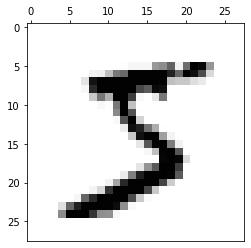

In [13]:
# import imageio
# import imgaug as ia

import mnist

training_data = list(mnist.read(dataset='training', path='./mnist'))
print(len(training_data))

# Here we get the first image, you can try switching the index to see different numbers
label, pixels = training_data[0]
print(label)
print(pixels.shape)
mnist.show(pixels)

Now lets save it as an png image so we can use it for augmentation later

In [14]:
from PIL import Image
import numpy

new_im = Image.fromarray(pixels)

# Lets make the image bigger so we can see it
new_im = new_im.resize( (512, 512))
new_im.save("mnist-first.png")

In you folder you show now see an image with the number 5 displayed

Lets see it here:

Original:


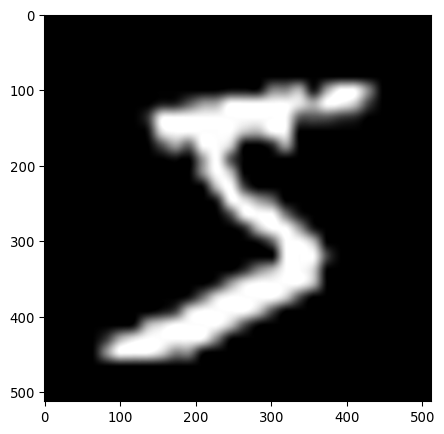

In [15]:
import imageio
import imgaug as ia
%matplotlib inline
image = imageio.imread("mnist-first.png")

print("Original:")
ia.imshow(image)

As we can see it is the number 5.

## Augment the Image

Now that we have loaded the image, let's augment it. imgaug contains many augmentation techniques in the form of classes deriving from the Augmenter parent class. To use one augmentation technique, we have to instantiate it with a set of hyperparameters and then later on apply it many times. Our first augmentation technique will be Affine, i.e. affine transformations. We keep it simple here and use that technique to rotate the image by a random value between -360° and +360°.

Augmented:


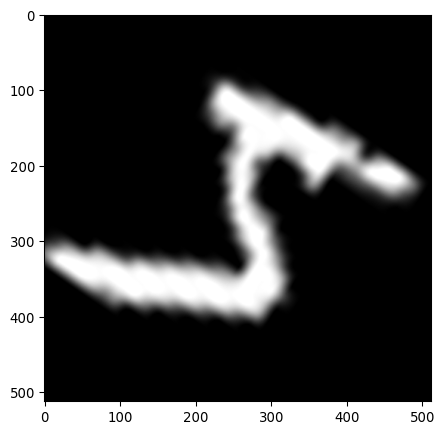

In [16]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-360, 360))
image_aug = rotate(image=image)

print("Augmented:")
ia.imshow(image_aug)

## Augment a Batch of Images

Of course, in reality we rarely just want to augment a single image. We can achieve this using the same code as above, just changing the signular parameter image to images. It is often significantly faster to augment a batch of images than to augment each image individually.

For simplicity, we create a batch here by just copying the original image several times and then feeding it through our rotation augmenter. To visualize our results, we use numpy's hstack() function, which combines the images in our augmented batch to one large image by placing them horizontally next to each other.

Augmented batch:


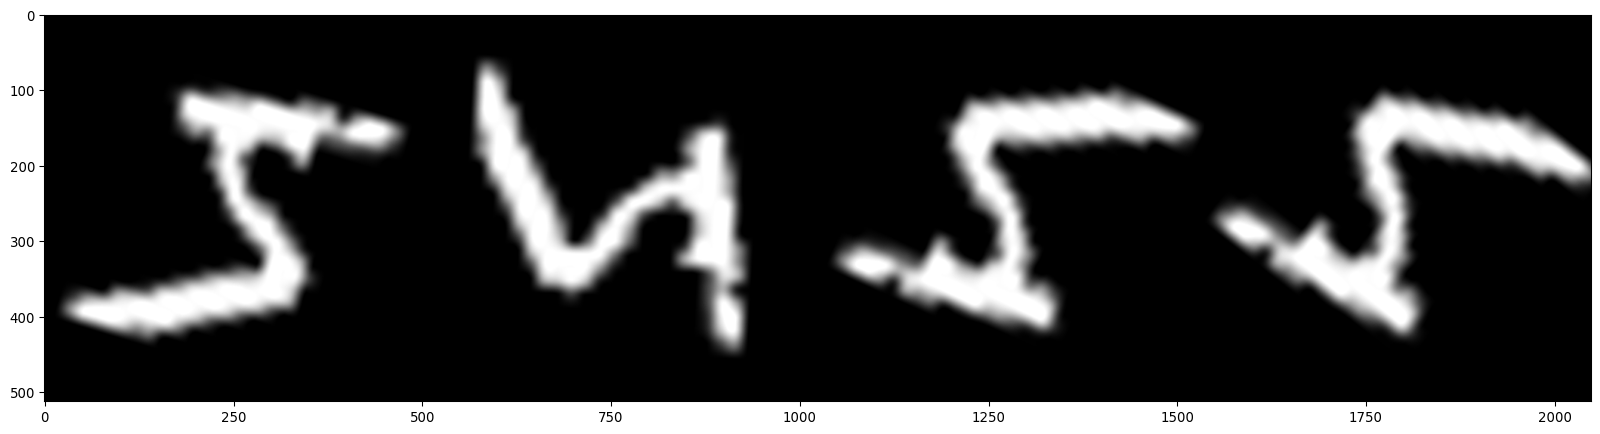

In [17]:
import numpy as np

images = [image, image, image, image]
images_aug = rotate(images=images)

print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

As you can see, all of the images in the batch were automatically rotated by different amounts. That's because when instantiating our affine transformation via rotate = iaa.Affine(rotate=(-25, 25)), we used an interval for the rotation, given as (-360, 360), which denotes a uniform distribution rotate ~ uniform(-360, 360). We could have also picked a constant value rotate=-360 to always rotate by -360° or a list rotate=[-360, -300, 0] to rotate by -360° or by -300° or by 0°. We could have also pick many other probability distributions, such as gaussian or poisson distributions. Take a look at the other notebooks or at the documentation for details on how to do that.

Lists of images or a single array. Note that in the example above we used a list to combine our images to one batch. We could have also provided a single numpy array of shape (N, H, W, [C]), where N would have been the number of images, H their height, W their width and C (optionally) the channel-axis. Using numpy arrays is generally preferred, as they save memory and can be a little bit faster to augment. However, if your images have different heights, widths or numbers of channels they cannot be combined to a single array and hence a list must be used.

## Use Many Augmentation Techniques Simultaneously

Performing only affine rotations is rather limiting. Therefore, in the next example we will combine several methods and apply them simultaneously to images. To do that, we could instantiate each technique on its own and apply them one after the other by calling augmenter(images=...) several times. Alternatively, we can use Sequential to combine the different augmenters into one pipeline and then apply them all in a single augmentation call. We will use Sequential below to apply affine rotations (Affine), add some gaussian noise (AdditiveGaussianNoise) and crop the images by removing 0% to 20% from each image side (Crop).

Augmented:


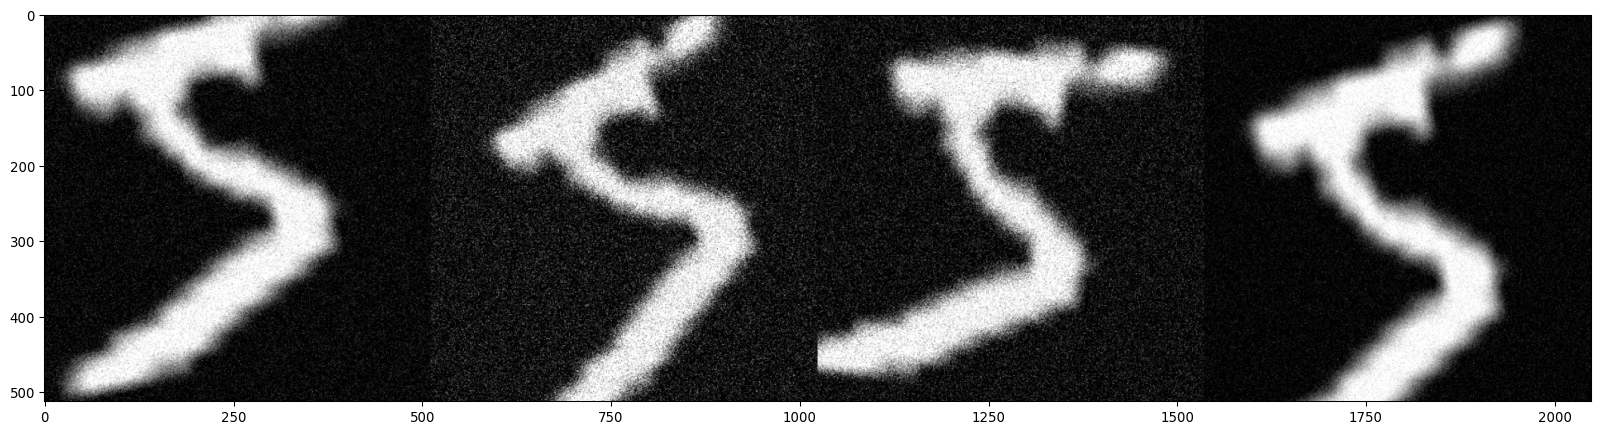

In [18]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(10, 60)),
    iaa.Crop(percent=(0, 0.2))
])

images_aug = seq(images=images)

print("Augmented:")
ia.imshow(np.hstack(images_aug))

## Task 3

Perform the same tasks as we did previously but now with an image from the F-MNIST dataset 

60000
9
(28, 28)


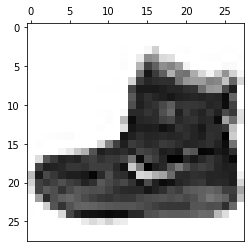

In [19]:
# import imageio
# import imgaug as ia

import fmnist

training_data = list(mnist.read(dataset='training', path='./fmnist'))
print(len(training_data))

# Here we get the first image, you can try switching the index to see different numbers
label, pixels = training_data[0]
print(label)
print(pixels.shape)
mnist.show(pixels)

In [35]:
from PIL import Image
import numpy

new_im = Image.fromarray(pixels)

# Lets make the image bigger so we can see it
new_im = new_im.resize( (512, 512))
new_im.save("fmnist-first.png")

Original:


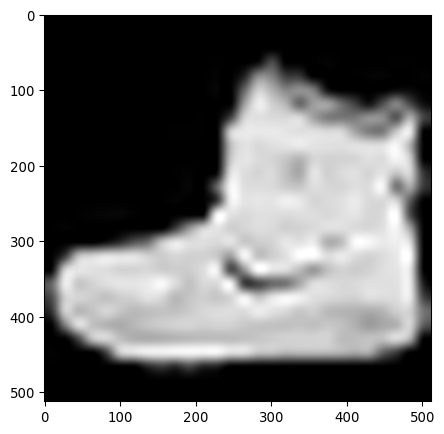

In [20]:
import imageio
import imgaug as ia
%matplotlib inline
image = imageio.imread("fmnist-first.png")

print("Original:")
ia.imshow(image)

Augmented:


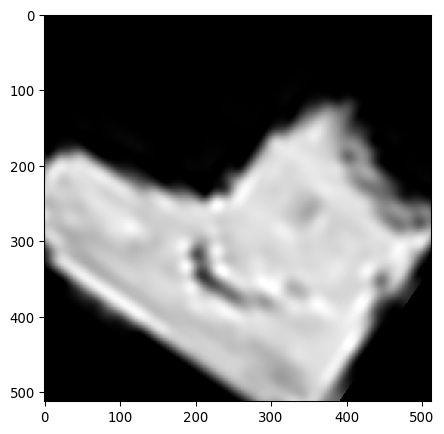

In [37]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-360, 360))
image_aug = rotate(image=image)

print("Augmented:")
ia.imshow(image_aug)

Augmented batch:


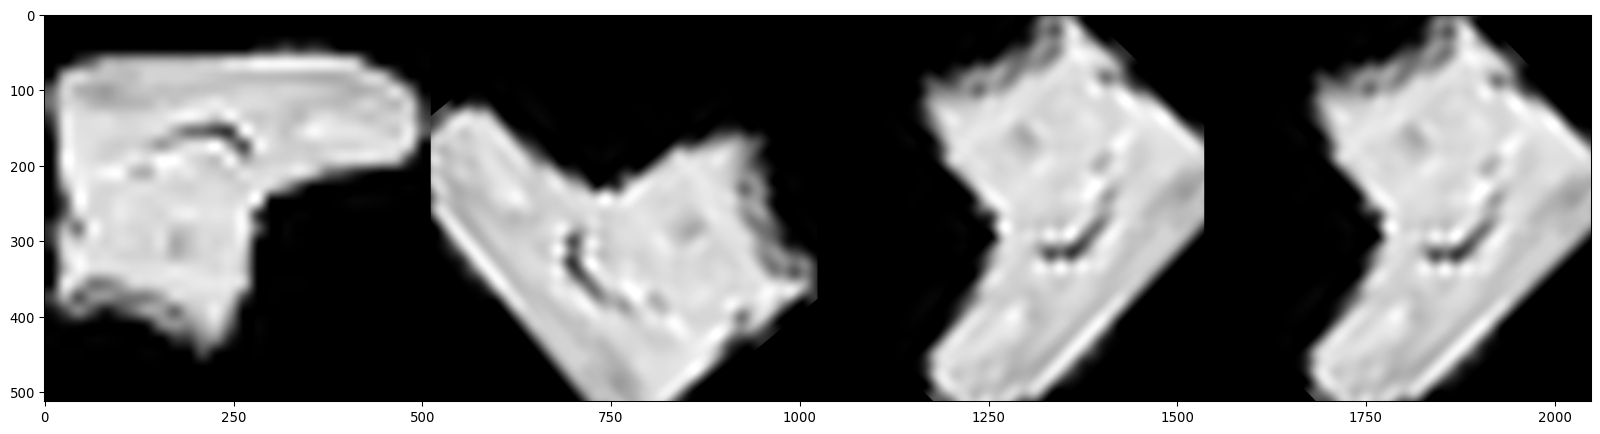

In [21]:
import numpy as np

images = [image, image, image, image]
images_aug = rotate(images=images)

print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

Augmented:


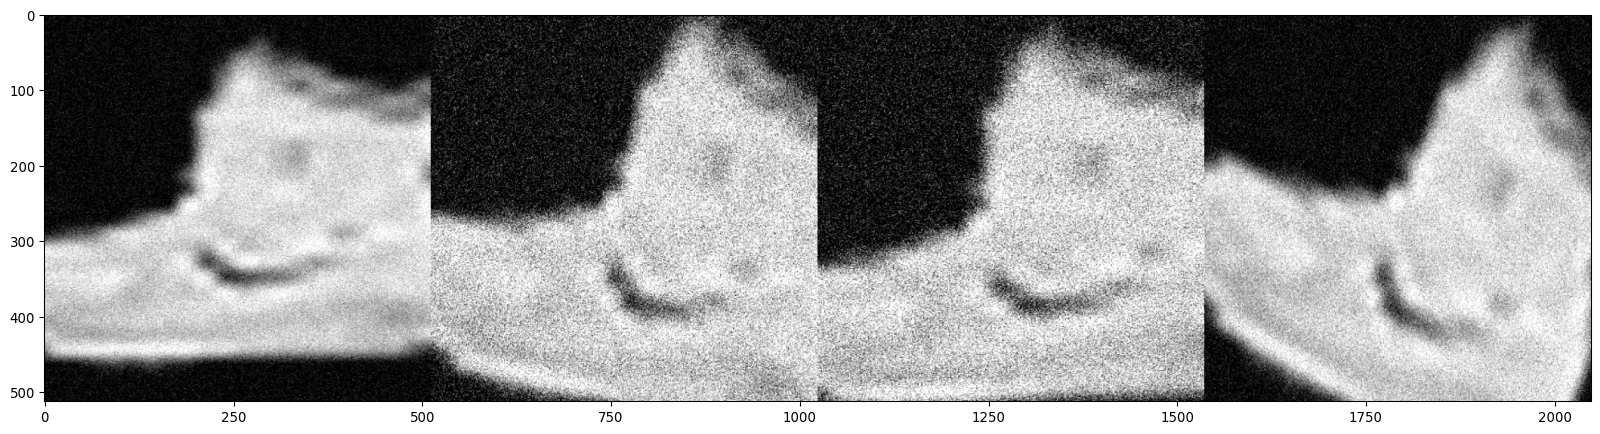

In [22]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(10, 60)),
    iaa.Crop(percent=(0, 0.2))
])

images_aug = seq(images=images)

print("Augmented:")
ia.imshow(np.hstack(images_aug))

In [42]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


AttributeError: module 'tensorflow.python.keras.datasets.fashion_mnist' has no attribute 'load_data'